# Fruit Type Classifier

This notebook performs data analysis and modeling on the provided dataset, focusing on Logistic Regression and Decision Tree models.

## Step 1: Importing libraries

In [1]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## Step 2: Data Understanding and Preparation   

In [2]:
#Read the data and renaming unnamed column to impove code readability and easier to work with DataFrame

data=pd.read_excel('fruit_data.xlsx')
data = data.rename(columns={'Unnamed: 0': 'id'})
data.drop('id', axis=1, inplace=True)
data.head()

,fruit_type,color,size,weight
0,grape,Yellow,Tiny,8.303385
1,apple,Pink,Largee,80.976370
2,banana,Pale Yellow,Large,74.615192
3,grape,Red,Tiny,6.924070
4,banana,Creamy White,Largee,82.002542


## Handling Missing Values and Outliers

In [3]:
# Check for missing values

print(data.isnull().sum())
data['size'] = data['size'].fillna('Unknown')

fruit_type    0
color         0
size          0
weight        0
dtype: int64


In [4]:
# Convert 'weight' to integers for simplicity

data['weight'] = data['weight'].astype(int)
data.head()

,fruit_type,color,size,weight
0,grape,Yellow,Tiny,8
1,apple,Pink,Largee,80
2,banana,Pale Yellow,Large,74
3,grape,Red,Tiny,6
4,banana,Creamy White,Largee,82


In [5]:
#Checking for Outliers

Q1 = data['weight'].quantile(0.25)
Q3 = data['weight'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers = data[(data['weight'] >= lower_bound) & (data['weight'] <= upper_bound)]

print("Original data shape:", data.shape)
print("Data shape after outlier removal:", data_no_outliers.shape)

Original data shape: (200, 4)
Data shape after outlier removal: (198, 4)


In [6]:
# Assuming 'fruit_type' is the target variable and you want to predict it based on other features

X = data_no_outliers.drop('fruit_type', axis=1)
y = data_no_outliers['fruit_type']

## Label Encoding the target variable

In [7]:
# Read the Excel file
fruits = pd.read_excel('fruit_data.xlsx', index_col=0)

# Add new column for label encoding
fruits['fruit_type_label'] = fruits['fruit_type']

# Display the first few rows
fruits.head()

,fruit_type,color,size,weight,fruit_type_label
0,grape,Yellow,Tiny,8.303385,grape
1,apple,Pink,Largee,80.976370,apple
2,banana,Pale Yellow,Large,74.615192,banana
3,grape,Red,Tiny,6.924070,grape
4,banana,Creamy White,Largee,82.002542,banana


In [8]:
#Label encoding for Target variable

from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
fruits['fruit_type_label']=encoder.fit_transform(fruits['fruit_type_label'])
fruits.head()

,fruit_type,color,size,weight,fruit_type_label
0,grape,Yellow,Tiny,8.303385,2
1,apple,Pink,Largee,80.976370,0
2,banana,Pale Yellow,Large,74.615192,1
3,grape,Red,Tiny,6.924070,2
4,banana,Creamy White,Largee,82.002542,1


# One-hot encoding for input categorial variable

In [9]:
#One-hot encoding for input categorial variable

categorical_cols = ['color', 'size']  # List of categorical columns
df_encoded = pd.get_dummies(X, columns=['color', 'size'], dtype='int')
print("Data shape after one-hot encoding:", df_encoded.shape)

df_encoded


Data shape after one-hot encoding: (198, 15)


,weight,color_Black,color_Creamy White,color_Green,color_Pale Yellow,color_Pink,color_Purple,color_Red,color_Yellow,color_Yellow1,size_Large,size_Largee,size_Medium,size_Small,size_Tiny
0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,80,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,74,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,6,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,82,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,9,0,0,0,0,0,1,0,0,0,0,0,0,1,0
196,39,0,0,0,1,0,0,0,0,0,1,0,0,0,0
197,7,0,0,0,0,0,0,1,0,0,0,0,0,1,0
198,4,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [10]:
# To get a sense of the diversity of data in the fruit_type column

print(fruits['fruit_type'].unique())

print(fruits.groupby('fruit_type').size())

['grape' 'apple' 'banana']
fruit_type
apple     70
banana    64
grape     66
dtype: int64


## Plotting the data

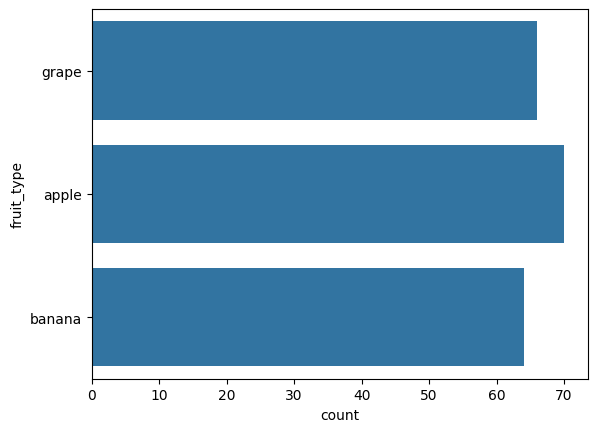

In [11]:
# To get a sense of the diversity of data in the color column (Data Imbalance Check)

import seaborn as sns
sns.countplot(fruits['fruit_type'],label="Count")
plt.show()

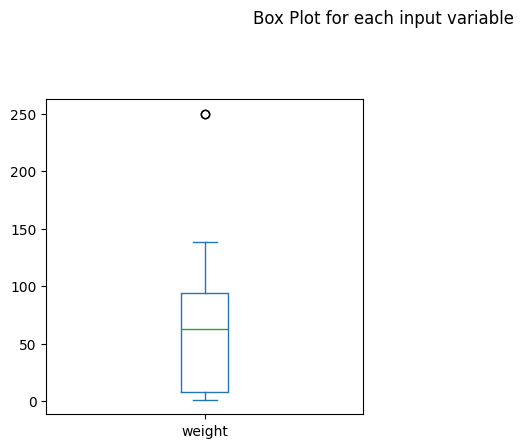

In [12]:
# To see the distribution of numerical data and outliers

fruits.drop('fruit_type_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

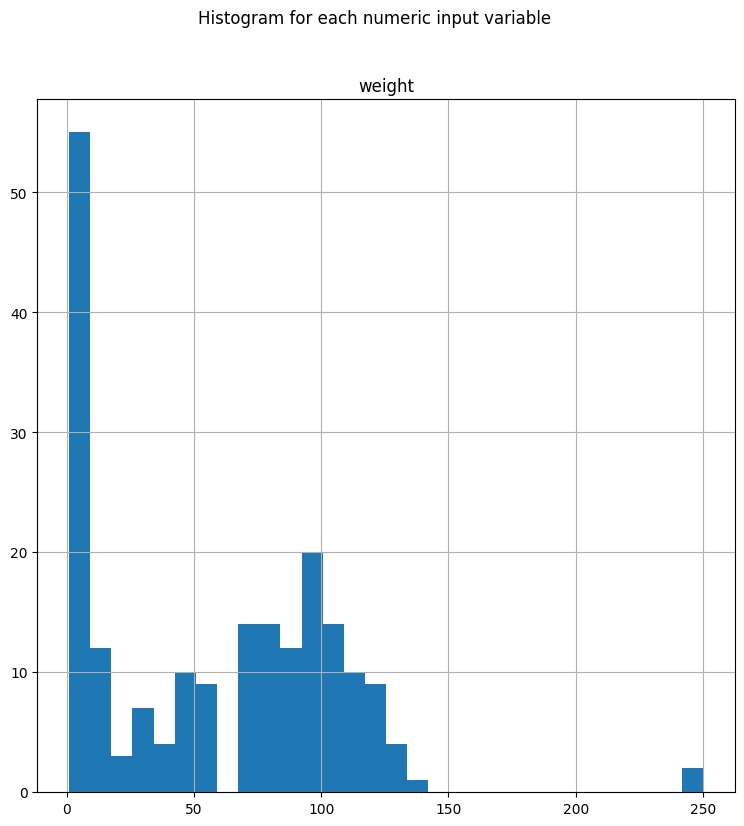

In [13]:
# To see the distribution of numerical data

# Plot histograms for numeric columns
fruits.drop('fruit_type_label', axis=1).hist(bins=30, figsize=(9, 9))

# Set the super title for the plots
plt.suptitle("Histogram for each numeric input variable")

# Save the plot to a file
plt.savefig('fruits_hist.png')

# Display the plot
plt.show()


## Step 3: Modeling and Analysis

## Logistic Regression

In [14]:
# Use logistic regression to solve this

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [15]:
# Scaling because if features are on different scales, it can lead to biased or inaccurate model results

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

In [16]:
# Logistic Regression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Evaluation

accuracy = logreg.score(X_test, y_test)
print("Logistic Regression Test Accuracy:", accuracy)

# Evaluation 

from sklearn.metrics import f1_score
y_pred = logreg.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
print("Logistic Regression F1-score:", f1)

Logistic Regression Test Accuracy: 0.78
Logistic Regression F1-score: 0.7777011494252873


## Decision Tree

In [17]:
# Define the model

model = DecisionTreeClassifier()

# Define the hyperparameter grid to search

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters

print("Best hyperparameters:", grid_search.best_params_)


# Get the best model

best_model = grid_search.best_estimator_

# Evaluate the best model on the test set

accuracy = best_model.score(X_test, y_test)
print("Test accuracy:", accuracy)

y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
print("Decision Tree score:", f1)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Test accuracy: 0.82
Decision Tree score: 0.82
